processing patient no.  CHGJ007


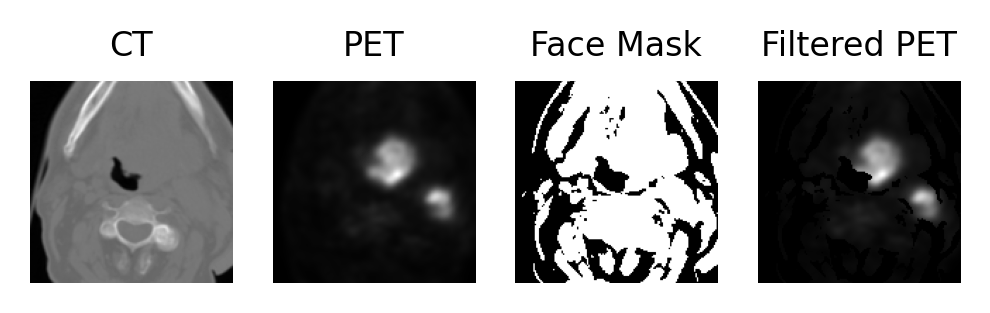

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from multiprocessing import Pool
import glob
import numpy as np


path_in = "/mnt/faststorage/jintao/HNSCC/hecktor2021_train/resampled/" #change to your train folder

pt = 'CHGJ007'
#_ct.nii.gz

print("processing patient no. ", pt)

CT_path = path_in + pt +'_ct.nii.gz'
PET_path = path_in + pt +'_pt.nii.gz'


pet_img = sitk.ReadImage(PET_path)
pet = sitk.GetArrayFromImage(pet_img)

ct_img = sitk.ReadImage(CT_path)
ct = sitk.GetArrayFromImage(ct_img)

fm  = ct > 0

PTfm = pet*fm

plt.figure(figsize=(4, 1), dpi=300)
plt.set_cmap('gray')
ax0 = plt.subplot(141)
ax0.imshow(ct[70])
ax0.axis('off')
ax0.set_title('CT', fontsize=8)
ax1 = plt.subplot(142)
ax1.imshow(pet[70])
ax1.axis('off')
ax1.set_title('PET', fontsize=8)
ax2 = plt.subplot(143)
ax2.imshow(fm[70])
ax2.axis('off')
ax2.set_title('Face Mask', fontsize=8)
ax3 = plt.subplot(144)
ax3.imshow(PTfm[70])
ax3.axis('off')
ax3.set_title('Filtered PET', fontsize=8)

plt.savefig('petfm.png', dpi =300)